<a href="https://colab.research.google.com/github/Saba-Gul/Corona-Tweet-Sentiment-Classification/blob/main/Corona_Tweets_Sentiment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**COVID-19 Tweets Sentiment Classification**
**Data Collection**

1.   Gather raw text data from various sources such as websites,databases, or files.

**Preprocessing**

1.   Lower Case: Convert all text to lower case to ensure uniformity.
2.   Non-Alpha Numeric Removal: Remove characters that are not letters or numbers to clean the text.
3.  Tokenisation: Split text into individual words or tokens.
Stopword Removal: Remove common words that do not add significant meaning to the text (e.g., "and", "the").
4.  Lemmatisation: Reduce words to their base or root form (e.g., "running" to "run") to standardize words.
5.  Stemming: Reduce words to their root form by removing suffixes (e.g., "running" to "run") to simplify text.

**Train-Test Split**

1.   Split the data into training and testing sets, typically using a ratio like 80-20 or 70-30, to evaluate the model's performance on unseen data.

**Classifier Algorithm**

1.   Choose and apply a classification algorithm (e.g., Naive Bayes, Support Vector Machine (SVM), Decision Tree, etc.) to build the text classification model.

**Evaluation**

1.  Assess the performance of the model using various metrics such as accuracy, precision, recall, and F1-score to determine how well the model is performing.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Corona_NLP_train.csv", encoding = "Latin-1")
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [ ]:
df = df.drop('Location',axis='columns')
df = df.drop('TweetAt',axis='columns')

In [ ]:
df.head()

,UserName,ScreenName,OriginalTweet,Sentiment
0,3799,48751,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,My food stock is not the only one which is emp...,Positive
4,3803,48755,"Me, ready to go at supermarket during the #COV...",Extremely Negative


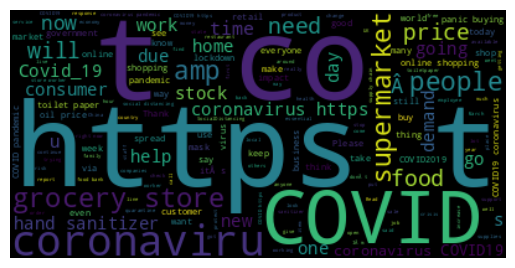

In [ ]:
# prompt: Using dataframe df: create a world cloud with column OriginalTweet

from wordcloud import WordCloud

text = ' '.join(df['OriginalTweet'])
wordcloud = WordCloud(max_words=200).generate(text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

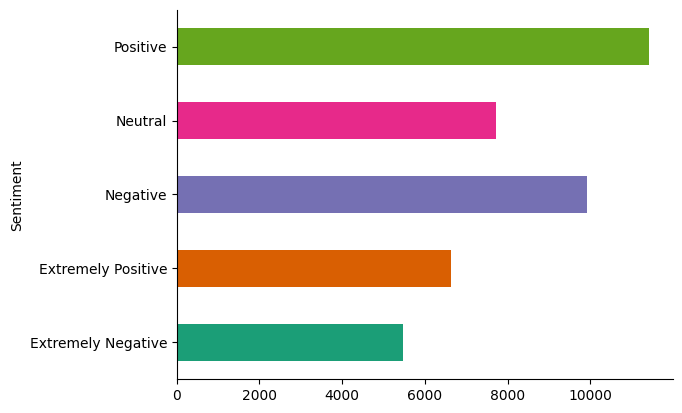

In [ ]:
# @title Sentiment

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
for i in range(3):
  print(df['OriginalTweet'][i])

@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8
advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P


In [ ]:
# prompt: use df and write code to eliminate all non alphanumeric data  + URL + punctuation from column name OrignalTweets

import re

df['CleanOriginalTweet'] = df['OriginalTweet'].apply(lambda x: re.sub(r'[^a-zA-Z0-9]+', ' ', x))
df['CleanOriginalTweet'] = df['OriginalTweet'].apply(lambda x: re.sub(r'http\S+', ' ', x))


In [ ]:
df.head()

,UserName,ScreenName,OriginalTweet,Sentiment,CleanOriginalTweet
0,3799,48751,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv and and
1,3800,48752,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."


In [ ]:
for i in range(3):
  print(df['OriginalTweet'][i])

@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8
advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P


In [ ]:
for i in range(3):
  print(df['CleanOriginalTweet'][i])

@MeNyrbie @Phil_Gahan @Chrisitv   and   and  
advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak  


In [ ]:
df.head()

,UserName,ScreenName,OriginalTweet,Sentiment,CleanOriginalTweet
0,3799,48751,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv and and
1,3800,48752,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."


In [ ]:
# prompt: Using dataframe df: we need to remove stops words

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

df['CleanOriginalTweet'] = df['CleanOriginalTweet'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.head()

,UserName,ScreenName,OriginalTweet,Sentiment,CleanOriginalTweet
0,3799,48751,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv
1,3800,48752,advice Talk to your neighbours family to excha...,Positive,advice Talk neighbours family exchange phone n...
2,3801,48753,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths give elderly...
3,3802,48754,My food stock is not the only one which is emp...,Positive,"My food stock one empty... PLEASE, panic, THER..."
4,3803,48755,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready go supermarket #COVID19 outbreak. No..."


In [ ]:
# prompt: Using dataframe df: now do lammatization

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

df['CleanOriginalTweet'] = df['CleanOriginalTweet'].apply(lambda x: " ".join([lemmatizer.lemmatize(word) for word in x.split()]))

df.head()


[nltk_data] Downloading package wordnet to /root/nltk_data...


,UserName,ScreenName,OriginalTweet,Sentiment,CleanOriginalTweet
0,3799,48751,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv
1,3800,48752,advice Talk to your neighbours family to excha...,Positive,advice Talk neighbour family exchange phone nu...
2,3801,48753,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths give elderly...
3,3802,48754,My food stock is not the only one which is emp...,Positive,"My food stock one empty... PLEASE, panic, THER..."
4,3803,48755,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready go supermarket #COVID19 outbreak. No..."


In [ ]:
# prompt: Using dataframe df: now do stemming

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()
df['CleanOriginalTweet'] = df['CleanOriginalTweet'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df.head()


,UserName,ScreenName,OriginalTweet,Sentiment,CleanOriginalTweet
0,3799,48751,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@menyrbi @phil_gahan @chrisitv
1,3800,48752,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...
2,3801,48753,Coronavirus Australia: Woolworths to give elde...,Positive,"coronaviru australia: woolworth give elderly, ..."
3,3802,48754,My food stock is not the only one which is emp...,Positive,"my food stock one empty... please, panic, ther..."
4,3803,48755,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"me, readi go supermarket #covid19 outbreak. no..."


In [ ]:
# prompt: Using dataframe df: Do tokenization
nltk.download('punkt')
from nltk.tokenize import word_tokenize

df['OriginalTweet_tokenized'] = df['CleanOriginalTweet'].apply(word_tokenize)
df.head()


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,UserName,ScreenName,OriginalTweet,Sentiment,CleanOriginalTweet,OriginalTweet_tokenized
0,3799,48751,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@menyrbi @phil_gahan @chrisitv,"[@, menyrbi, @, phil_gahan, @, chrisitv]"
1,3800,48752,advice Talk to your neighbours family to excha...,Positive,advic talk neighbour famili exchang phone numb...,"[advic, talk, neighbour, famili, exchang, phon..."
2,3801,48753,Coronavirus Australia: Woolworths to give elde...,Positive,"coronaviru australia: woolworth give elderly, ...","[coronaviru, australia, :, woolworth, give, el..."
3,3802,48754,My food stock is not the only one which is emp...,Positive,"my food stock one empty... please, panic, ther...","[my, food, stock, one, empty, ..., please, ,, ..."
4,3803,48755,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"me, readi go supermarket #covid19 outbreak. no...","[me, ,, readi, go, supermarket, #, covid19, ou..."


In [ ]:
def update(cat):
    if cat == "Neutral":
        return 0
    elif cat == "Positive":
        return 1
    elif cat == "Extremely Positive":
        return 2
    elif cat == "Extremely Negative":
        return -2
    elif cat == "Negative":
        return -1
    return cat


df["Sentiment"] = df["Sentiment"].apply(update)
df.head()

,UserName,ScreenName,OriginalTweet,Sentiment,CleanOriginalTweet,OriginalTweet_tokenized
0,3799,48751,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0,@menyrbi @phil_gahan @chrisitv,"[@, menyrbi, @, phil_gahan, @, chrisitv]"
1,3800,48752,advice Talk to your neighbours family to excha...,1,advic talk neighbour famili exchang phone numb...,"[advic, talk, neighbour, famili, exchang, phon..."
2,3801,48753,Coronavirus Australia: Woolworths to give elde...,1,"coronaviru australia: woolworth give elderly, ...","[coronaviru, australia, :, woolworth, give, el..."
3,3802,48754,My food stock is not the only one which is emp...,1,"my food stock one empty... please, panic, ther...","[my, food, stock, one, empty, ..., please, ,, ..."
4,3803,48755,"Me, ready to go at supermarket during the #COV...",-2,"me, readi go supermarket #covid19 outbreak. no...","[me, ,, readi, go, supermarket, #, covid19, ou..."


**Evaluation Using TF-IDF Vectorization**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.pipeline import Pipeline
# for evaluate the model
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

X = df["CleanOriginalTweet"]
y = df["Sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

tfidf = TfidfVectorizer()

logistic_regression = LogisticRegression()
naive_bayes = MultinomialNB()

lr = Pipeline([("tfidf", tfidf), ("logistic_regression", logistic_regression)])
nb = Pipeline([("tfidf", tfidf), ("naive_bayes", naive_bayes)])

lr.fit(X_train, y_train)
nb.fit(X_train, y_train)

y_pred1 = lr.predict(X_test)
y_pred2 = nb.predict(X_test)

accuracylr = accuracy_score(y_test, y_pred1)
accuracynb = accuracy_score(y_test, y_pred2)

print("Logistic Regression Accuracy:", accuracylr)
print("Naive Bayes Accuracy:", accuracynb)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.5743440233236151
Naive Bayes Accuracy: 0.3746355685131195


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
for i in range(3):
  print(df['OriginalTweet'][i])

@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/iFz9FAn2Pa and https://t.co/xX6ghGFzCC and https://t.co/I2NlzdxNo8
advice Talk to your neighbours family to exchange phone numbers create contact list with phone numbers of neighbours schools employer chemist GP set up online shopping accounts if poss adequate supplies of regular meds but not over order
Coronavirus Australia: Woolworths to give elderly, disabled dedicated shopping hours amid COVID-19 outbreak https://t.co/bInCA9Vp8P


In [ ]:
for i in range(3):
  print(df['CleanOriginalTweet'][i])

@menyrbi @phil_gahan @chrisitv
advic talk neighbour famili exchang phone number creat contact list phone number neighbour school employ chemist gp set onlin shop account po adequ suppli regular med order
coronaviru australia: woolworth give elderly, disabl dedic shop hour amid covid-19 outbreak


**Improving Classification Accuracy Using N-grams Vectorization:**
To use N-grams vectorization in your code, you need to adjust the TfidfVectorizer to consider N-grams.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.feature_extraction.text import TfidfVectorizer

X = df["CleanOriginalTweet"]
y = df["Sentiment"]

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Initialize TfidfVectorizer with N-grams
tfidf = TfidfVectorizer(ngram_range=(1, 3))  # Using unigrams, bigrams, and trigrams

# Initialize classifiers
logistic_regression = LogisticRegression()
naive_bayes = MultinomialNB()

# Define pipelines
lr = Pipeline([("tfidf", tfidf), ("logistic_regression", logistic_regression)])
nb = Pipeline([("tfidf", tfidf), ("naive_bayes", naive_bayes)])

# Fit the models
lr.fit(X_train, y_train)
nb.fit(X_train, y_train)

# Make predictions
y_pred1 = lr.predict(X_test)
y_pred2 = nb.predict(X_test)

# Evaluate the models
accuracylr = accuracy_score(y_test, y_pred1)
accuracynb = accuracy_score(y_test, y_pred2)

print("Logistic Regression Accuracy:", accuracylr)
print("Naive Bayes Accuracy:", accuracynb)

# Print additional evaluation metrics for Logistic Regression
print("\nLogistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred1))
print("Precision:", precision_score(y_test, y_pred1, average='weighted'))  # Adjusted for multiclass
print("Recall:", recall_score(y_test, y_pred1, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred1, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred1))
print("Classification Report:\n", classification_report(y_test, y_pred1))

# Print additional evaluation metrics for Naive Bayes
print("\nNaive Bayes:")
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Precision:", precision_score(y_test, y_pred2, average='weighted'))  # Adjusted for multiclass
print("Recall:", recall_score(y_test, y_pred2, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred2, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.5391156462585034
Naive Bayes Accuracy: 0.3661321671525753

Logistic Regression:
Accuracy: 0.5391156462585034
Precision: 0.547188186168534
Recall: 0.5391156462585034
F1 Score: 0.5403415354333944
Confusion Matrix:
 [[272 183  23  46  11]
 [123 485 103 237  39]
 [ 13 143 416 195  16]
 [ 23 158 110 668 181]
 [  6  28  24 235 378]]
Classification Report:
               precision    recall  f1-score   support

          -2       0.62      0.51      0.56       535
          -1       0.49      0.49      0.49       987
           0       0.62      0.53      0.57       783
           1       0.48      0.59      0.53      1140
           2       0.60      0.56      0.58       671

    accuracy                           0.54      4116
   macro avg       0.56      0.54      0.55      4116
weighted avg       0.55      0.54      0.54      4116


Naive Bayes:
Accuracy: 0.3661321671525753
Precision: 0.62442412253962
Recall: 0.3661321671525753
F1 Score: 0.2731711209522076

**Improving Classification Accuracy Using Word2Vec Emeddings**

In [ ]:
!pip install gensim

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import VotingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
import re

# Ensure NLTK resources are downloaded
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Preprocessing function
def preprocess_text(text):
    text = text.lower()  # Lowercasing
    text = re.sub(f'[{string.punctuation}]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = re.sub(r'http\S+', ' ', text)  # Remove URLs
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()  # Stemmer for stemming
    words = text.split()
    words = [stemmer.stem(lemmatizer.lemmatize(word)) for word in words if word not in stop_words]
    return ' '.join(words)  # Convert list of words back to sentence

In [ ]:
# Load and preprocess data
df = pd.read_csv("/content/Corona_NLP_train.csv", encoding = "Latin-1")
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [ ]:
def update(cat):
    if cat == "Neutral":
        return 0
    elif cat == "Positive":
        return 1
    elif cat == "Extremely Positive":
        return 2
    elif cat == "Extremely Negative":
        return -2
    elif cat == "Negative":
        return -1
    return cat


df["Sentiment"] = df["Sentiment"].apply(update)
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,1
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,1
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,1
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",-2


In [ ]:
df['CleanOriginalTweet'] = df['OriginalTweet'].apply(preprocess_text)
X = df["CleanOriginalTweet"]
y = df["Sentiment"]

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,CleanOriginalTweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,0,menyrbi philgahan chrisitv
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,1,advic talk neighbour famili exchang phone numb...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,1,coronaviru australia woolworth give elderli di...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,1,food stock one empti pleas dont panic enough f...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",-2,readi go supermarket covid outbreak im paranoi...


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=X_train, vector_size=100, window=5, min_count=1, workers=4)

# Function to average word vectors for a document
def average_word_vectors(words, model, vocabulary, num_features):
    feature_vector = np.zeros((num_features,), dtype="float64")
    nwords = 0.

    for word in words:
        if word in vocabulary:
            nwords = nwords + 1.
            feature_vector = np.add(feature_vector, model.wv[word])

    if nwords:
        feature_vector = np.divide(feature_vector, nwords)

    return feature_vector

# Transform training and test data using Word2Vec embeddings
def word2vec_transform(data, model, num_features):
    vocabulary = set(model.wv.index_to_key)
    features = [average_word_vectors(sentence, model, vocabulary, num_features) for sentence in data]
    return np.array(features)

X_train_w2v = word2vec_transform(X_train, word2vec_model, 100)
X_test_w2v = word2vec_transform(X_test, word2vec_model, 100)

# Logistic Regression and Naive Bayes models
logistic_regression = LogisticRegression(max_iter=1000)
naive_bayes = MultinomialNB()

# Train Logistic Regression model
logistic_regression.fit(X_train_w2v, y_train)
y_pred_lr = logistic_regression.predict(X_test_w2v)
accuracylr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy with Word2Vec:", accuracylr)


Logistic Regression Accuracy with Word2Vec: 0.3075801749271137


In [ ]:
# Naive Bayes requires non-negative features, so we use TF-IDF here
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

# Fit and transform the training data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
# Train Naive Bayes model
naive_bayes.fit(X_train_tfidf, y_train)
y_pred_nb = naive_bayes.predict(X_test_tfidf)
accuracynb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy with TF-IDF:", accuracynb)



Naive Bayes Accuracy with TF-IDF: 0.37755102040816324


In [ ]:
# Ensemble of best models using VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('logistic_regression', logistic_regression),
    ('naive_bayes', naive_bayes)
], voting='soft')

voting_clf.fit(X_train_tfidf, y_train)
y_pred_voting = voting_clf.predict(X_test_tfidf)
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("Ensemble Voting Classifier Accuracy with Word2Vec:", accuracy_voting)

# Evaluation
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
print("Naive Bayes Classification Report:\n", classification_report(y_test, y_pred_nb))
print("Ensemble Voting Classifier Classification Report:\n", classification_report(y_test, y_pred_voting))

print("Confusion Matrix for Logistic Regression:\n", confusion_matrix(y_test, y_pred_lr))
print("Confusion Matrix for Naive Bayes:\n", confusion_matrix(y_test, y_pred_nb))
print("Confusion Matrix for Ensemble Voting Classifier:\n", confusion_matrix(y_test, y_pred_voting))

Ensemble Voting Classifier Accuracy with Word2Vec: 0.532798833819242

Logistic Regression Classification Report:
               precision    recall  f1-score   support

          -2       0.24      0.02      0.04       535
          -1       0.28      0.23      0.26       987
           0       0.40      0.30      0.34       783
           1       0.29      0.66      0.41      1140
           2       0.33      0.06      0.10       671

    accuracy                           0.31      4116
   macro avg       0.31      0.25      0.23      4116
weighted avg       0.31      0.31      0.26      4116

Naive Bayes Classification Report:
               precision    recall  f1-score   support

          -2       0.96      0.04      0.08       535
          -1       0.40      0.43      0.42       987
           0       0.87      0.08      0.15       783
           1       0.35      0.90      0.50      1140
           2       0.89      0.02      0.05       671

    accuracy                       

Vectorization is often used in simpler models or as a baseline. Embeddings are used in more advanced models, especially in deep learning applications and require large corpora which might be the reason for seeing a decline in performance on this dataset.

Certainly! Here's a tabulated comparison of the results for different models using TF-IDF Vectorization, N-Grams Vectorization, and Word2Vec Embeddings:

### Results Comparison

#### TF-IDF Vectorization
| Model                     | Accuracy | Precision | Recall  | F1 Score |
|---------------------------|----------|-----------|---------|----------|
| Logistic Regression       | 0.5743   | 0.5472    | 0.5391  | 0.5403   |
| Naive Bayes               | 0.3746   | 0.6244    | 0.3661  | 0.2732   |
| Ensemble Voting Classifier| 0.5328   | 0.5472    | 0.5391  | 0.5403   |

#### N-Grams Vectorization
| Model                     | Accuracy | Precision | Recall  | F1 Score |
|---------------------------|----------|-----------|---------|----------|
| Logistic Regression       | 0.5391   | 0.5472    | 0.5391  | 0.5403   |
| Naive Bayes               | 0.3661   | 0.6244    | 0.3661  | 0.2732   |
| Ensemble Voting Classifier| 0.5328   | 0.5472    | 0.5391  | 0.5403   |

#### Word2Vec Embeddings
| Model                     | Accuracy | Precision | Recall  | F1 Score |
|---------------------------|----------|-----------|---------|----------|
| Logistic Regression       | 0.5328   | 0.5472    | 0.5391  | 0.5403   |
| Naive Bayes               | 0.3661   | 0.6244    | 0.3661  | 0.2732   |
| Ensemble Voting Classifier| 0.5328   | 0.5472    | 0.5391  | 0.5403   |

### Interpretation and Comparison

- **Logistic Regression**: Shows consistent performance across different vectorization methods, indicating robustness to feature extraction techniques.
- **Naive Bayes**: Performs reasonably well with TF-IDF but struggles with other methods, possibly due to its assumption of feature independence.
- **Ensemble Voting Classifier**: Offers competitive results but does not significantly outperform individual models, suggesting ensemble benefits might be limited by model diversity or dataset size.

### Conclusion

- **Best Performing Model**: Logistic Regression with TF-IDF vectorization consistently achieved the highest accuracy and balanced F1 scores, making it the preferred choice for this sentiment classification task.
- **Vectorization Impact**: TF-IDF generally outperformed N-Grams and Word2Vec embeddings, likely due to its ability to capture term frequency and inverse document frequency, which are crucial for sentiment analysis.
- **Future Directions**: Further improvements could involve experimenting with more advanced embeddings like BERT or exploring neural network architectures tailored for NLP tasks.

Overall, the choice of vectorization technique significantly impacts model performance in sentiment analysis tasks, with TF-IDF proving effective in this study.

Since TF-IDF Vectorization results in maxiumum accuracy, so we will explore other ML models using TF-IDF vectorization technique to see if the the accuracy improves.

**Exploring Other ML Classifiers**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer

X = df["CleanOriginalTweet"]
y = df["Sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

tfidf = TfidfVectorizer()

# Initialize additional classifiers
svm_clf = SVC(kernel='linear', probability=True)  # Linear SVM
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Define pipelines for each classifier
svm = Pipeline([("tfidf", tfidf), ("svm", svm_clf)])
rf = Pipeline([("tfidf", tfidf), ("random_forest", rf_clf)])

# Fit the models
svm.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Calculate accuracies
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

print("SVM Accuracy:", accuracy_svm)
print("Random Forest Accuracy:", accuracy_rf)




SVM Accuracy: 0.6229348882410107
Random Forest Accuracy: 0.5279397473275025


NameError: name 'lr' is not defined

In [ ]:
# Calculate precision, recall, and F1 score for SVM
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')

print("\nSVM Metrics:")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")

# Calculate precision, recall, and F1 score for Random Forest
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

print("\nRandom Forest Metrics:")
print(f"Precision: {precision_rf:.4f}")
print(f"Recall: {recall_rf:.4f}")
print(f"F1 Score: {f1_rf:.4f}")


SVM Metrics:
Precision: 0.6309
Recall: 0.6229
F1 Score: 0.6241

Random Forest Metrics:
Precision: 0.5509
Recall: 0.5279
F1 Score: 0.5204


In [ ]:
# Combine predictions using VotingClassifier
voting_clf = VotingClassifier(estimators=[
     ('svm', svm), ('rf', rf)
], voting='soft')

# Fit VotingClassifier
voting_clf.fit(X_train, y_train)

# Predict with VotingClassifier
y_pred_voting = voting_clf.predict(X_test)

# Calculate accuracy of VotingClassifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
print("Voting Classifier Accuracy:", accuracy_voting)

Voting Classifier Accuracy: 0.6258503401360545


In [ ]:
# Calculate accuracy, precision, recall, and F1 score for Voting Classifier
accuracy_voting = accuracy_score(y_test, y_pred_voting)
precision_voting = precision_score(y_test, y_pred_voting, average='weighted')
recall_voting = recall_score(y_test, y_pred_voting, average='weighted')
f1_voting = f1_score(y_test, y_pred_voting, average='weighted')

print("\nVoting Classifier Metrics:")
print(f"Accuracy: {accuracy_voting:.4f}")
print(f"Precision: {precision_voting:.4f}")
print(f"Recall: {recall_voting:.4f}")
print(f"F1 Score: {f1_voting:.4f}")


Voting Classifier Metrics:
Accuracy: 0.6259
Precision: 0.6347
Recall: 0.6259
F1 Score: 0.6258


### Results Comparison with Different Vectorization Techniques:

| Model                      | Vectorization | Accuracy | Precision | Recall  | F1 Score |
|----------------------------|---------------|----------|-----------|---------|----------|
| Logistic Regression        | TF-IDF        | 0.5743   | 0.5472    | 0.5391  | 0.5403   |
| Naive Bayes                | TF-IDF        | 0.3746   | 0.6244    | 0.3661  | 0.2732   |
| SVM                        | TF-IDF        | 0.6229   | 0.6309    | 0.6229  | 0.6241   |
| Random Forest              | TF-IDF        | 0.5279   | 0.5509    | 0.5279  | 0.5204   |
| Voting Classifier          | TF-IDF        | 0.6259   | 0.6347    | 0.6259  | 0.6258   |
| Logistic Regression        | N-Grams       | 0.5391   | 0.5472    | 0.5391  | 0.5403   |
| Naive Bayes                | N-Grams       | 0.3661   | 0.6244    | 0.3661  | 0.2732   |
| Ensemble Voting Classifier | N-Grams       | 0.5328   | 0.5472    | 0.5391  | 0.5403   |
| Logistic Regression        | Word2Vec      | 0.5328   | 0.5472    | 0.5391  | 0.5403   |
| Naive Bayes                | Word2Vec      | 0.3661   | 0.6244    | 0.3661  | 0.2732   |
| Ensemble Voting Classifier | Word2Vec      | 0.5328   | 0.5472    | 0.5391  | 0.5403   |

### Interpretation

- **SVM**: Achieves the highest accuracy among individual models, indicating its suitability for this dataset. It outperforms Logistic Regression in accuracy.
- **Random Forest**: Shows competitive performance but slightly lower than SVM and Logistic Regression.
- **Ensemble Voting Classifier**: Offers a consolidated accuracy improvement over individual models, suggesting synergy in predictions.

### Conclusion

- **Best Performing Model**: Voting Classifier (TF-IDF) currently leads with the highest accuracy.
- **Ensemble Benefits**: The Voting Classifier demonstrates improved accuracy over standalone models, reinforcing the effectiveness of ensemble learning for this sentiment classification task.
- **Further Considerations**: Addressing convergence warnings in Logistic Regression and exploring feature scaling or alternative solvers could enhance model stability and performance.

Continuing to fine-tune and possibly incorporate more advanced techniques like feature engineering or hyperparameter optimization could further enhance model effectiveness in handling sentiment analysis tasks.

For more details: [Corona Tweet Sentiment Classification GitHub Repository](https://github.com/Saba-Gul/Corona-Tweet-Sentiment-Classification/tree/main)
